In [44]:
import numpy as np
import cv2
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [53]:
face_cascade = cv2.CascadeClassifier('G:\Github\opencv\data\haarcascades\haarcascade_frontalface_default.xml')

In [54]:
cap = cv2.VideoCapture(0)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 30.0, (640,480))

from keras.models import load_model
model = load_model('model_weights/facial_expression_model_structure_weights.h5')

# from keras.models import model_from_json
# model = model_from_json(open("facial_expression_model_structure.json", "r").read())
# model.load_weights('facial_expression_model_weights.h5') #load weights

In [55]:
%matplotlib inline
import time
import pylab as pl
from IPython import display

def emotion_analysis(emotions):
    pl.clf()
    pl.plot(emotions)
    pl.ylim(0, 1)
    display.clear_output(wait=True)
    display.display(pl.gcf())
#     objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
#     y_pos = np.arange(len(objects))
#     plt.bar(y_pos, emotions, align='center', alpha=0.5)
#     plt.xticks(y_pos, objects)
#     plt.ylabel('percentage')
#     plt.title('emotion')
#     plt.show()
#     plt.close()

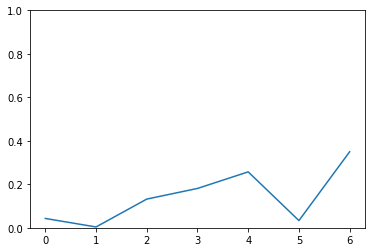

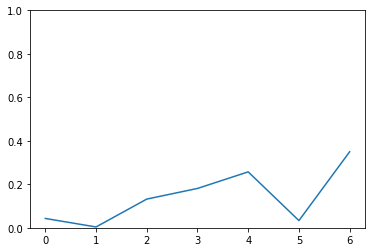

In [56]:
emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

while(True):
    ret, img = cap.read()
    cv2.waitKey(50)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    #print(faces) #locations of detected faces

    for (x,y,w,h) in faces:
        minFrame = w > 200 and h > 200
        if minFrame:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #draw rectangle to main image
            detected_face = img[int(y):int(y+h), int(x):int(x+w)] #crop detected face
            detected_face = cv2.cvtColor(detected_face, cv2.COLOR_BGR2GRAY) #transform to gray scale
            detected_face = cv2.resize(detected_face, (48, 48)) #resize to 48x48
            
            detected_face = cv2.equalizeHist(detected_face)
            
            img_pixels = image.img_to_array(detected_face)
            img_pixels = np.expand_dims(img_pixels, axis = 0)

            img_pixels /= 255 #pixels are in scale of [0, 255]. normalize all pixels in scale of [0, 1]

            predictions = model.predict(img_pixels) #store probabilities of 7 expressions
            emotion_analysis(predictions[0])
            #find max indexed array 0: angry, 1:disgust, 2:fear, 3:happy, 4:sad, 5:surprise, 6:neutral
            max_index = np.argmax(predictions[0])

            emotion = emotions[max_index]

            #write emotion text above rectangle
            cv2.putText(img, emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
            out.write(img)
            
    cv2.imshow('img',img)
    if cv2.waitKey(1) & 0xFF == ord('q'): #press q to quit
        break

#kill open cv things		
cap.release()
out.release()
cv2.destroyAllWindows()